In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os import path
import sys


repo_path= path.dirname(path.dirname(path.abspath("__file__")))
sys.path.append(repo_path)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import deque

from src.ac_agent import AgentDDPG, OUNoise, GaussianProcess
from src.utils import get_noise_schedulling

In [6]:
action_size = 1 
random_seed = 123

In [7]:
ou_nouse = OUNoise(action_size, random_seed)

In [9]:
ou_nouse.sample()

array([0.01047272])

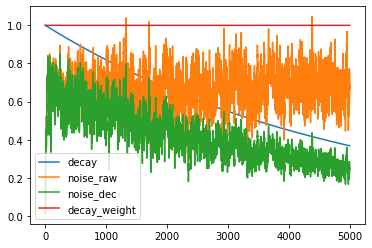

In [4]:
ou_noise1 = OUNoise(1, 123)

ou_noise1_schedulling = get_noise_schedulling(5000, decay=0.9998, noise=ou_noise1)
ou_noise1_schedulling.plot()
plt.show()

In [ ]:
ou_noise1

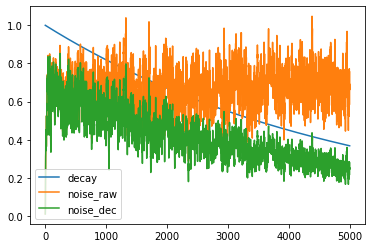

In [33]:
ou_noise2 = OUNoise(1, 123, mu=0., theta=0.15, sigma=0.2)

ou_noise2_schedulling = get_noise_schedulling(5000, decay=0.9998, noise=ou_noise2)
ou_noise2_schedulling.plot()
plt.show()

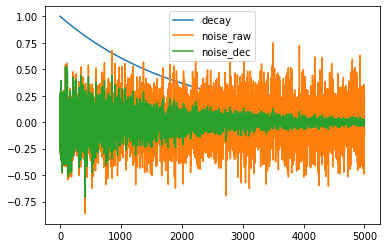

In [36]:
g_noise = GaussianProcess(1, 123, mu=0, sigma=0.2)

g_noise_schedulling = get_noise_schedulling(5000, decay=0.9995, noise=g_noise)
g_noise_schedulling.plot()
plt.show()

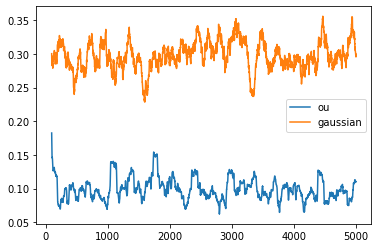

In [22]:
ou_noise1_schedulling['noise_raw'].rolling(100).std().plot(label='ou')
g_noise_schedulling['noise_raw'].rolling(100).std().plot(label='gaussian')
plt.legend()
plt.show()

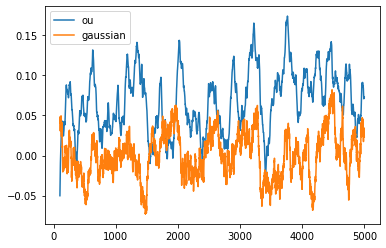

In [23]:
(ou_noise1_schedulling['noise_raw'].rolling(100).mean()-0.6).plot(label='ou') 
g_noise_schedulling['noise_raw'].rolling(100).mean().plot(label='gaussian')
plt.legend()
plt.show()